# Segmentação de Clientes - Customer Segmentation

Segmentação de clientes para campanhas customizadas de Marketing em uma rede de *Food Delivery*.

Esse é um projeto de clusterização.

Disponível também em meu <a href='https://github.com/rafaelgfelippe/CustomerSegmentation'>github</a>.

O conjunto de dados utilizado está disponível <a href='https://www.kaggle.com/rafaelgfelippe/food-delivery'>neste link</a>.

## 1. Entendimento do Negócio

A Big Rango é um restaurante do tipo *Dark Kitchen*, ou seja, é um estabelecimento de serviço de alimentação que oferece apenas comida para viagem. Atuando em 9 cidades, a Big Rango é um restaurante 100% delivery, onde os pedidos são realizados via telefone ou internet, e entregues diretamente aos clientes.

Visando oferecer uma comunicação assertiva e personalizada, a Big Rango contratou um consultor em ciência de dados para realizar a segmentação de seus clientes. O principal objetivo da empresa é identificar os principais padrões de consumo e assim, realizar campanhas de Marketing customizadas para cada grupo de clientes. 

Além disso, a empresa também estuda adicionar novos pratos no cardápio, que atualmente, é composto por pizzas, bebidas, saladas e sobremesas. A segmentação dos clientes também pode auxiliar a empresa nessa tarefa.  

### 1.1 Dicionário de Dados

Em relação ao conjunto de dados, as seguintes informações foram disponibilizadas:

- Os dados estão em formato estruturado e serão disponibilizados em um arquivo "csv".
- A variável **`id_transacao`** possui o mesmo código para cada item dentro de um pedido.
- Todos os pedidos são referentes ao ano de 2019.
- A empresa não trabalha das 2 às 10 horas da manhã.

Além disso, também foi disponibilizado o dicionário de dados:

* **`id_transacao`**: identificação do pedido.

* **`horario_pedido`**: horário do pedido.

* **`localidade`**: local da unidade do restaurante.

* **`nome_item`**: nome do item pedido.

* **`quantidade_item`**: quantidade do item no pedido.

* **`latitude`**: latitude da localidade do restaurante.

* **`longitude`**: longitude da localidade do restaurante.

### 1.2 Estratégia da Solução

Como estratégia para a solução dos problemas, definimos as seguintes etapas:

- **1. Entendimento do Negócio:** nesta etapa inicial, realizamos uma breve introdução sobre o tema do projeto, entendemos as necessidades do cliente e definimos nossos objetivos.


- **2. Entendimento dos Dados:** o objetivo é realizar um tratamento inicial para verificar a qualidade dos dados, também realizaremos uma análise mais detalhada a fim de responder perguntas sobre o negócio.


- **3. Engenharia de Atributos:** nessa sessão, iremos visualizar os dados de uma outra perspectiva, além de realizar a seleção das melhores variáveis.


- **4. Pré-Processamento dos Dados:** nesta etapa, o objetivo é preparar os dados para a aplicação do modelo de Machine Learning.


- **5. Modelagem Preditiva:** utilizaremos o *K-means*, um dos algoritmos mais utilizados para problemas de clusterização. 


- **6. Análise de Clusters:** iremos explorar os clusters com objetivo de identificar padrões e recomendar ações para a área de Marketing.


- **7. Conclusões Finais:** por fim, entregaremos o resultado final do projeto.

## 2. Entendimento dos Dados

Vamos iniciar o projeto carregando as bibliotecas e o conjunto de dados.

### 2.1 Bibliotecas Necessárias

In [1]:
# Filtragem das mensagens de avisos.
options(warn = -1)
options(dplyr.summarise.inform = FALSE)

# Carregando as bibliotecas. 
library(pacman)

pacman::p_load(clustertend,
               corrplot,
               data.table,
               dplyr,
               factoextra,
               ggplot2,
               grid,
               lubridate,
               NbClust,
               readr,
               scales,
               tidyr,
               tidytext,
               wesanderson)

In [2]:
# Configurações do notebook.

# Plotagens.
options(repr.plot.width = 10, 
        repr.plot.height = 6, 
        scipen = 999)

# Estilo dos gráficos.
theme_set(theme_classic())

# Função para alterar o tamanho da área de plotagens.
fig <- function(width, heigth){
    options(repr.plot.width = width, 
            repr.plot.height = heigth)}

### 2.2 Tratamento Inicial dos Dados

Nessa etapa, nosso objetivo é realizar uma análise geral no dataset a fim de tratar possíveis inconsistências nos dados.

In [3]:
# Carregando o conjunto de dados.
df <- read_csv('dataset.csv')


-- Column specification --------------------------------------------------------
cols(
  id_transacao = col_character(),
  horario_pedido = col_datetime(format = ""),
  localidade = col_double(),
  nome_item = col_character(),
  quantidade_item = col_double(),
  latitude = col_double(),
  longitude = col_double()
)



Criar uma cópia do dataset é uma boa prática para não perdermos o conteúdo original durante a manipulação dos dados.

In [4]:
# Cópia do dataset.
df1 <- df

In [5]:
# Dimensão do dataframe.
dim(df1)

[1] 260645      7

O conjunto de dados possui 260.645 registros e 7 variáveis.

In [6]:
# Visualizando o dataframe.
head(df1)

id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.79413,-88.01014
0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.79413,-88.01014
0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.79413,-88.01014
0x12b47f,2019-09-04 12:36:00,3,salada,1,41.88449,-87.62706
0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.88449,-87.62706
0x6d6979,2019-03-18 00:27:00,6,pizza,2,41.78458,-87.60756


In [7]:
# Informações do dataframe.
str(df1)

spec_tbl_df [260,645 x 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id_transacao   : chr [1:260645] "0x7901ee" "0x7901ee" "0x7901ee" "0x12b47f" ...
 $ horario_pedido : POSIXct[1:260645], format: "2019-01-16 18:33:00" "2019-01-16 18:33:00" ...
 $ localidade     : num [1:260645] 7 7 7 3 3 6 6 2 2 2 ...
 $ nome_item      : chr [1:260645] "bebida" "pizza" "sobremesa" "salada" ...
 $ quantidade_item: num [1:260645] 2 2 2 1 1 2 2 2 2 2 ...
 $ latitude       : num [1:260645] 41.8 41.8 41.8 41.9 41.9 ...
 $ longitude      : num [1:260645] -88 -88 -88 -87.6 -87.6 ...
 - attr(*, "spec")=
  .. cols(
  ..   id_transacao = col_character(),
  ..   horario_pedido = col_datetime(format = ""),
  ..   localidade = col_double(),
  ..   nome_item = col_character(),
  ..   quantidade_item = col_double(),
  ..   latitude = col_double(),
  ..   longitude = col_double()
  .. )


In [8]:
# Verificando registros ausentes.
colSums(is.na(df1))

id_transacao  horario_pedido      localidade       nome_item quantidade_item 
              0               0               0               0               0 
       latitude       longitude 
              0               0

In [9]:
# Verificando registros duplicados.
table(duplicated(df1))


 FALSE 
260645 

In [10]:
# Verificando registros únicos.
sapply(df1, function(x) {length(unique(x))})

id_transacao  horario_pedido      localidade       nome_item quantidade_item 
         100000           76799               9               4               5 
       latitude       longitude 
              9               9

- Temos informações de 100 mil pedidos.
- Existem 9 localidades diferentes.
- As variáveis **`latitude`** e **`longitude`** serão descartadas, pois, estão representadas na variável **`localidade`**.

In [11]:
# Excluindo as variáveis.
df1 <- subset(df1, select = -c(latitude, longitude))

Não detectamos problemas em relação aos dados, sendo assim, seguiremos para a análise exploratória.

### 2.3 Análise Exploratória

Nesta etapa, iniciaremos uma análise mais detalhada com o objetivo de extrair insights do negócio.

In [12]:
# Variáveis do dataframe.
colnames(df1)

[1] "id_transacao"    "horario_pedido"  "localidade"      "nome_item"      
[5] "quantidade_item"

In [13]:
# Estatísticas das variáveis.
summary(df1[c('horario_pedido',
              'localidade', 
              'quantidade_item')])

 horario_pedido                  localidade    quantidade_item
 Min.   :2019-01-01 00:00:00   Min.   :1.000   Min.   :1.000  
 1st Qu.:2019-04-02 13:12:00   1st Qu.:3.000   1st Qu.:1.000  
 Median :2019-07-01 11:49:00   Median :5.000   Median :2.000  
 Mean   :2019-07-01 21:07:00   Mean   :5.135   Mean   :2.447  
 3rd Qu.:2019-09-30 18:07:00   3rd Qu.:7.000   3rd Qu.:4.000  
 Max.   :2019-12-30 23:59:00   Max.   :9.000   Max.   :5.000  

- A variável **`localidade`** possui valores de 1 a 9.
- A variável **`quantidade_item`** possui valores de 1 a 5.

In [14]:
# Contagem de registros.
table(df1$nome_item)


   bebida     pizza    salada sobremesa 
    46156     76122     38367    100000 

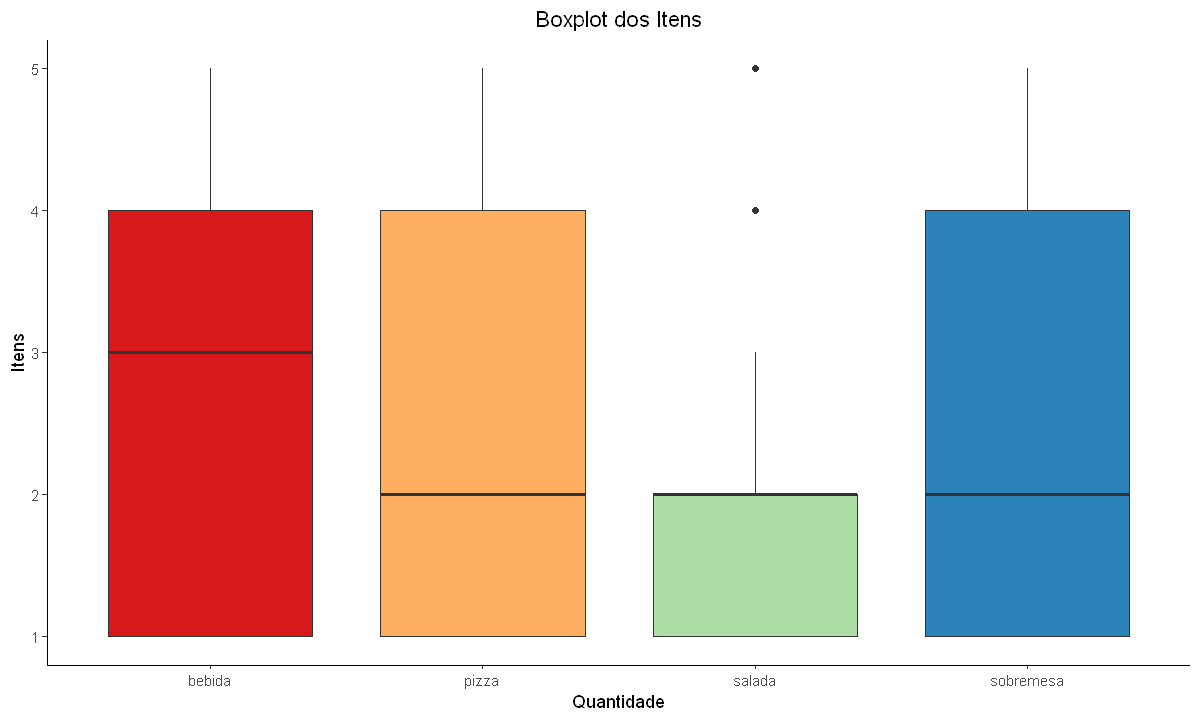

In [15]:
# Boxplot's dos itens.
df1 %>%
ggplot(aes(x = nome_item, y = quantidade_item)) +
geom_boxplot(aes(fill = nome_item), show.legend = FALSE) +
scale_fill_brewer(palette = 'Spectral') +
ggtitle('Boxplot dos Itens') + theme(plot.title = element_text(hjust = 0.5)) + 
labs(x = 'Quantidade', y = 'Itens')

- A classe bebida tem como mediana 3 unidades, enquanto as demais estão na faixa de 2 unidades.
- Clientes que pedem 4 ou 5 itens da classe salada são considerados *outliers*.

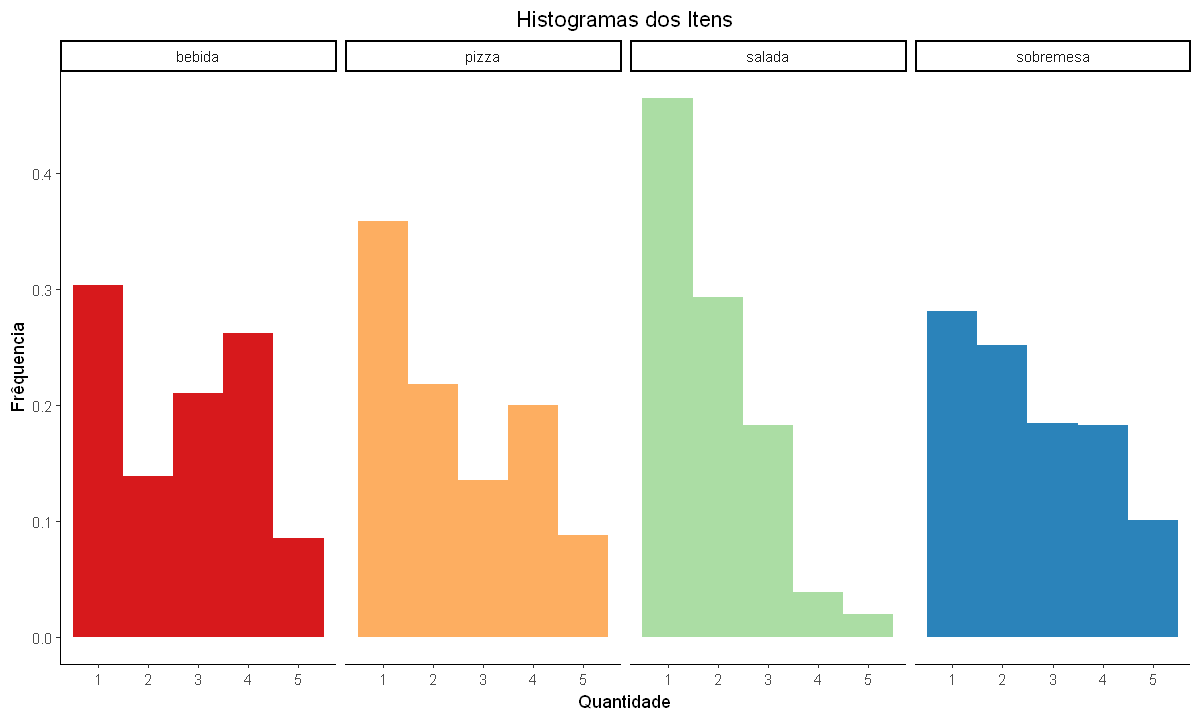

In [16]:
# Histogramas dos itens.
df1 %>%
select(nome_item, quantidade_item) %>% 
ggplot(aes(x = quantidade_item, fill = nome_item)) +
geom_histogram(aes(y = ..density..), bins = 5,  show.legend = FALSE) +
scale_fill_brewer(palette = 'Spectral') +
facet_grid(~nome_item) +
ggtitle('Histogramas dos Itens') + theme(plot.title = element_text(hjust = 0.5)) +  
labs(x = 'Quantidade', y = 'Frêquencia')

- Para a classe salada, existem poucos pedidos que solicitam mais que 3 unidades.
- A sobremesa é o item mais pedido do cardápio e possui uma distribuição mais uniforme. 

#### 2.3.1 Perguntas de Negócio

Agora que entendemos o que as variáveis representam, vamos criar algumas perguntas sobre o negócio.

- **P1.** Qual o mês que teve o maior e o menor número de pedidos?
- **P2.** Qual o dia do mês que gerou o maior e o menor número de pedidos?
- **P3.** Há diferenças significativas no número de pedidos em relação ao dia da semana?
- **P4.** Qual o horário gera o maior número de pedidos?
- **P5.** Quais são os itens mais pedidos por horário?
- **P6.** Quais as localidades que mais geram pedidos?
- **P7.** Quais os itens mais pedidos em cada localidade?

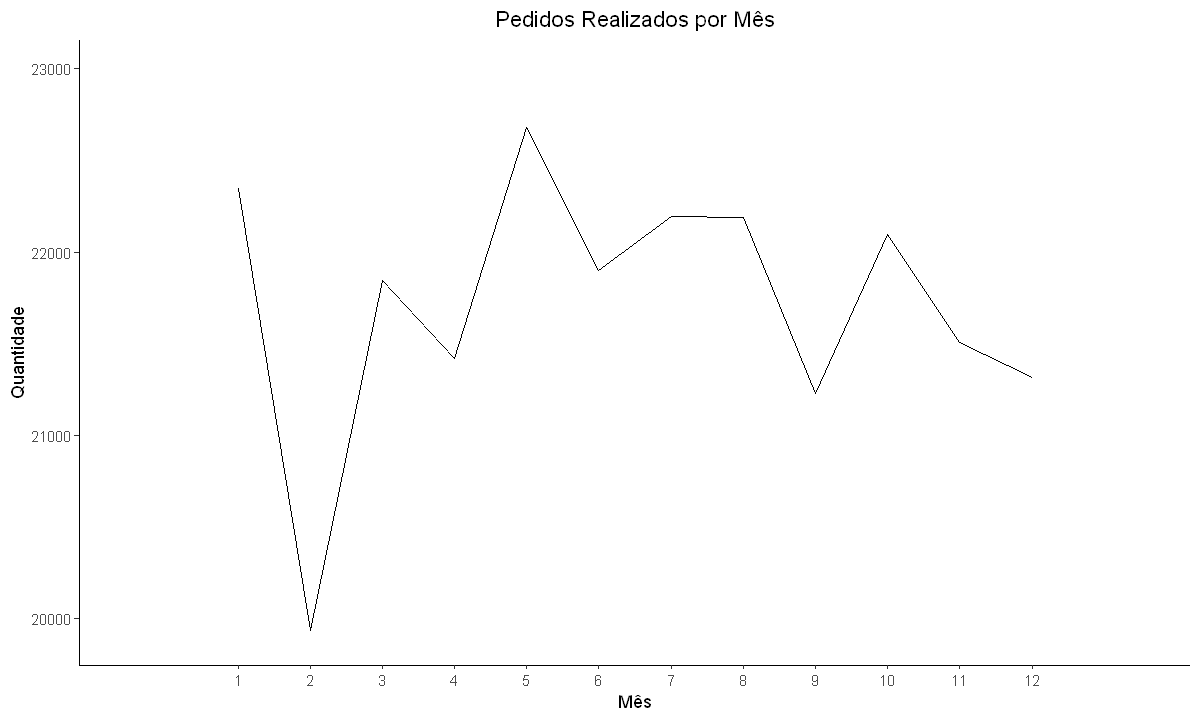

In [17]:
# Pergunta 1.
df1 %>% 
mutate(mes = month(horario_pedido)) %>%
ggplot(aes(mes)) +
geom_freqpoly(binwidth = 1) +
ylim(c(19900, 23000)) +
scale_x_continuous(breaks = 1:12) +
ggtitle('Pedidos Realizados por Mês') + theme(plot.title = element_text(hjust = 0.5)) + 
labs(x = 'Mês', y = 'Quantidade')

Pergunta 1:

- **P1.** Qual o mês que teve o maior e o menor número de pedidos?
    - Maio foi o mês que teve o maior número de pedidos, enquanto fevereiro registrou o menor número.

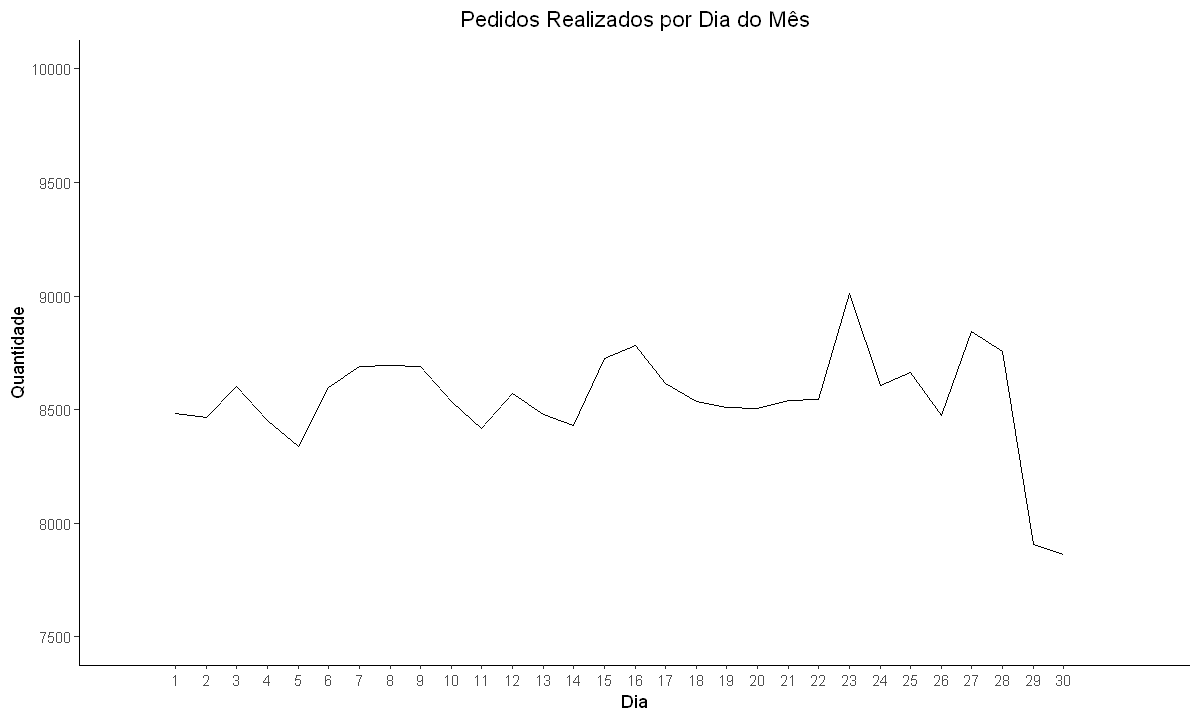

In [18]:
# Pergunta 2.
df1 %>% 
mutate(dia = day(horario_pedido),
       mes = month(horario_pedido),
       ano = year(horario_pedido)) %>% 
ggplot(aes(dia)) +
geom_freqpoly(binwidth = 1) +
ylim(c(7500, 10000)) +
scale_x_continuous(breaks = 1:30) +
ggtitle('Pedidos Realizados por Dia do Mês') + theme(plot.title = element_text(hjust = 0.5)) + 
labs(x = 'Dia', y = 'Quantidade')

Pergunta 2:

- **P2.** Qual o dia do mês que gerou o maior e o menor número de pedidos?
    - Contabilizando todos os meses, o dia 23 é o que gerou o maior número de pedidos, enquanto o dia 30 gerou o menor número.
    
Para responder a pergunta 3 criaremos uma função para gerar várias plotagens. 

In [19]:
# Criando a função.
p_dia_semana <- function(month, color){
    df1 %>%
    mutate(ano = year(horario_pedido),
           mes = month(horario_pedido),
           dia_mes = day(horario_pedido),
           dia_semana = weekdays(horario_pedido),
           horas = hour(horario_pedido)) %>%
    mutate(dia_semana = factor(dia_semana, levels = c('segunda-feira',
                                                      'terça-feira',
                                                      'quarta-feira',
                                                      'quinta-feira',
                                                      'sexta-feira', 
                                                      'sábado', 
                                                      'domingo'),
                               labels = c('seg', 'ter', 'qua', 'qui', 'sex', 'sáb', 'dom'))) %>%
    filter(ano == 2019, mes == month) %>% 
    group_by(dia_semana) %>% 
    dplyr::summarise(n = n()) %>% 
    ggplot(aes(x = dia_semana, y = n)) +
    geom_col(size = 1, fill = color) +
    ggtitle(sprintf('Mês %d', month))+
    xlab('') +
    geom_text(aes(label = round(n/sum(n), 2)), 
              vjust = 1.6, 
              color = 'black', 
              size = 5)}

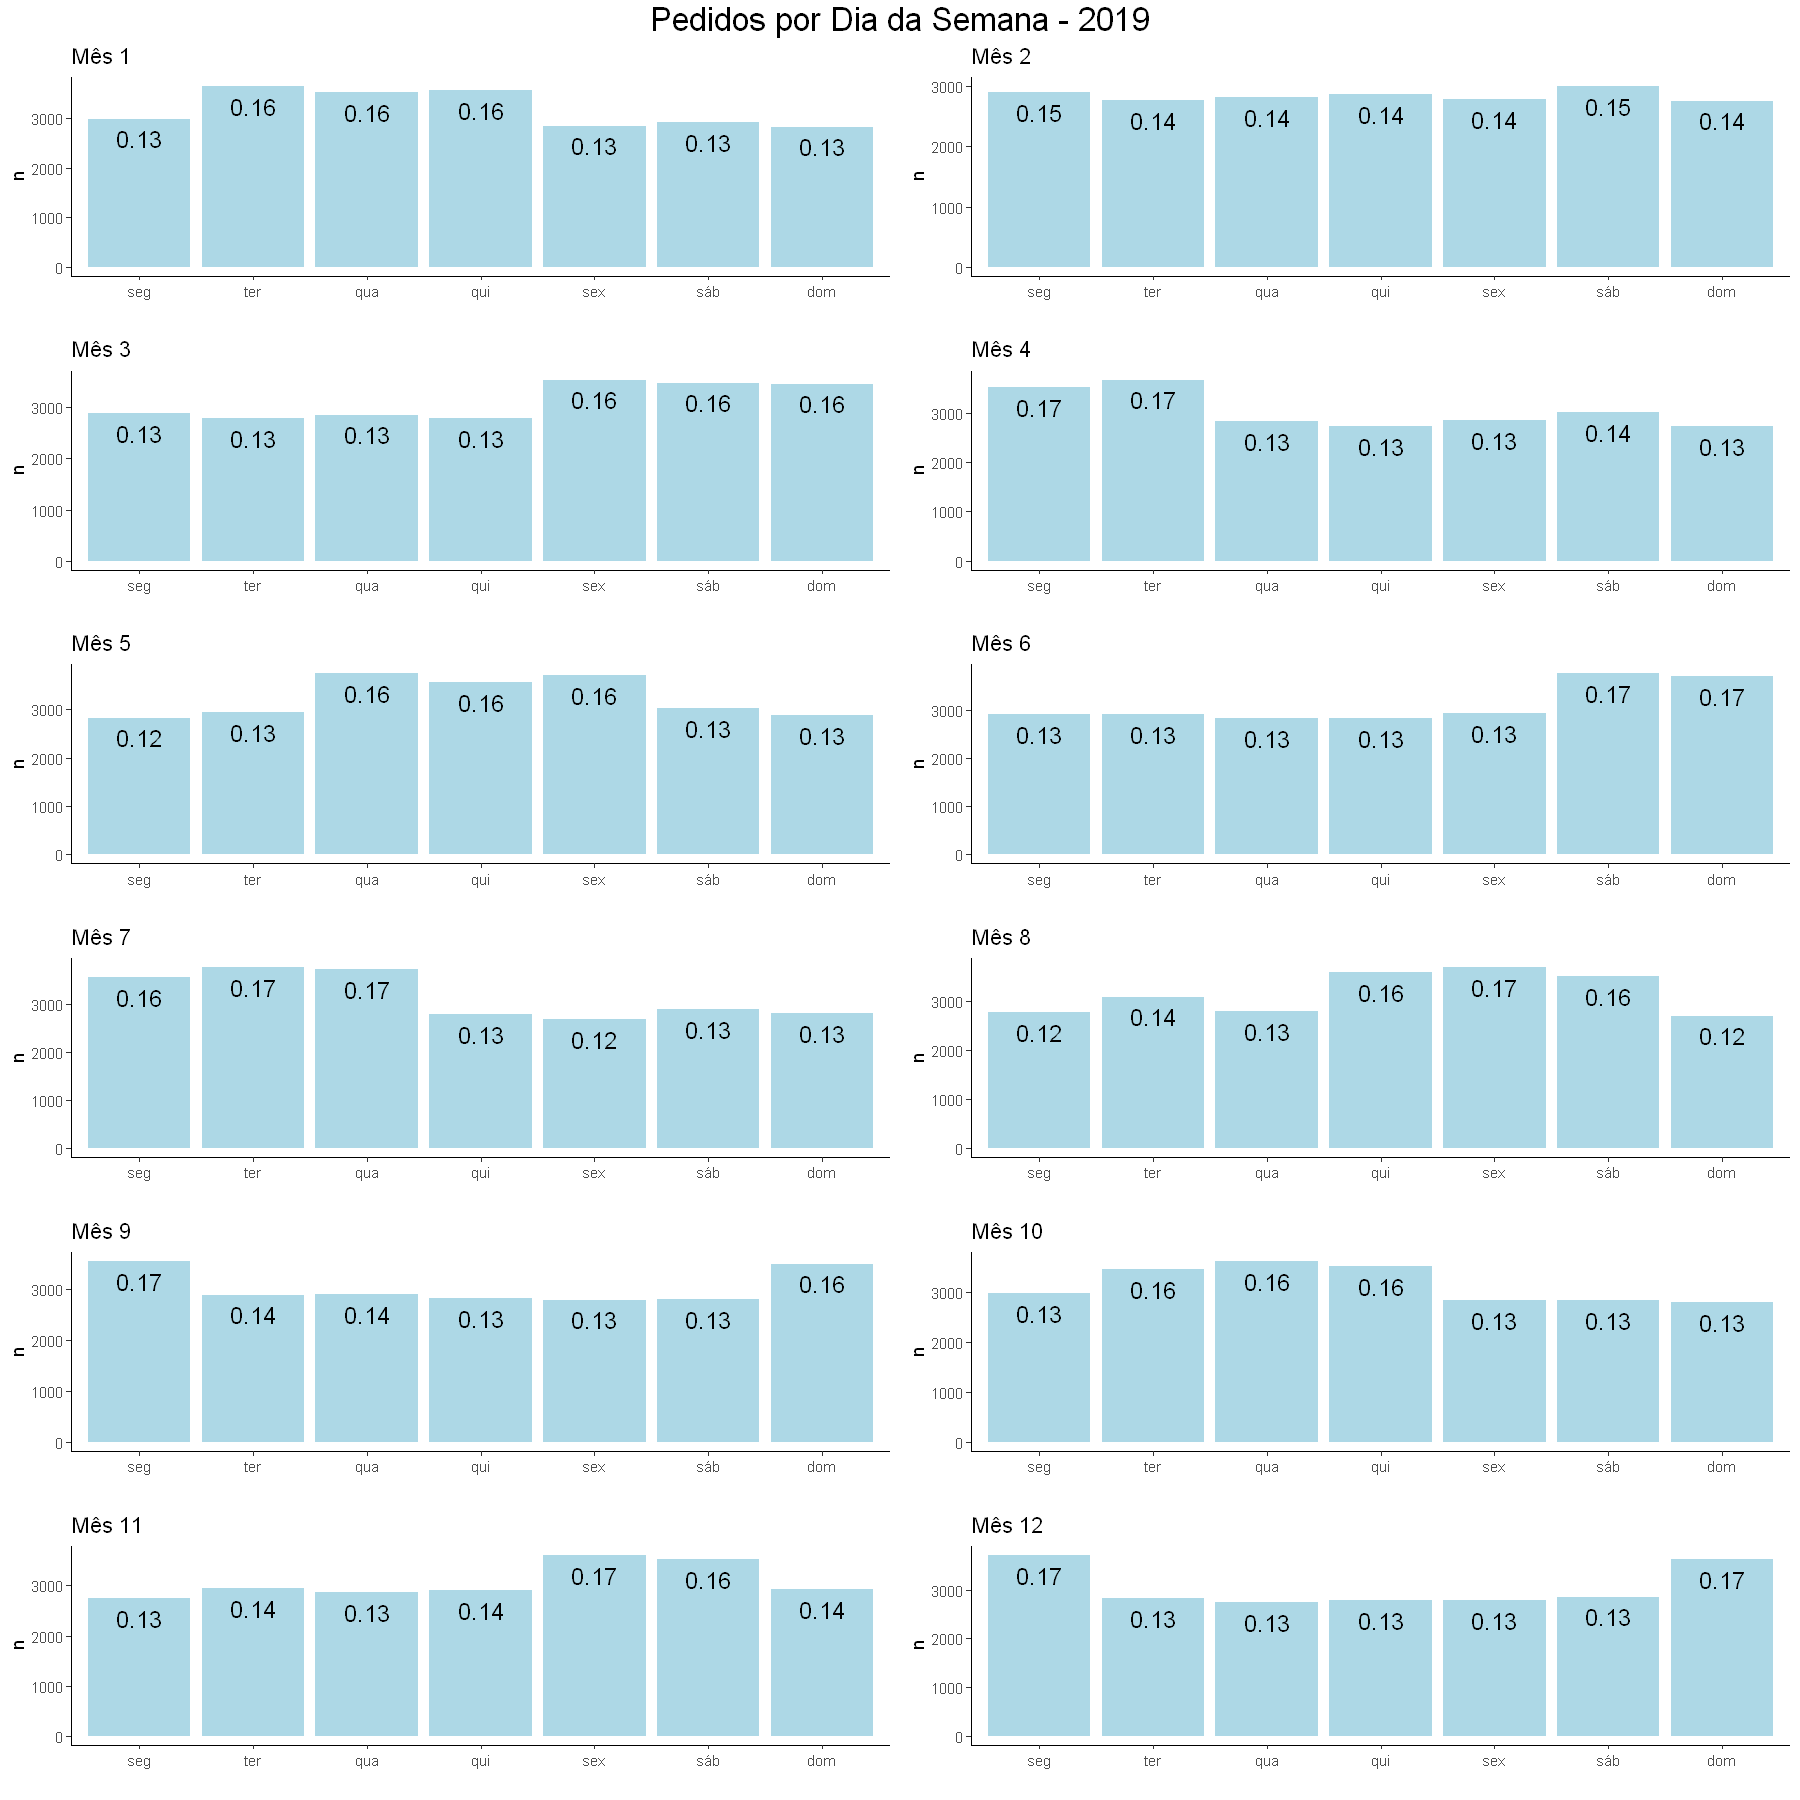

In [20]:
# Pergunta 3.

# Redefinindo a área de plotagem.
fig(15,15)

# Plotagens.
gridExtra::grid.arrange(p_dia_semana(1, 'lightblue'),
                        p_dia_semana(2, 'lightblue'),
                        p_dia_semana(3, 'lightblue'),
                        p_dia_semana(4, 'lightblue'),
                        p_dia_semana(5, 'lightblue'),
                        p_dia_semana(6, 'lightblue'),
                        p_dia_semana(7, 'lightblue'),
                        p_dia_semana(8, 'lightblue'),
                        p_dia_semana(9, 'lightblue'),
                        p_dia_semana(10, 'lightblue'),
                        p_dia_semana(11, 'lightblue'),
                        p_dia_semana(12, 'lightblue'),
                        ncol = 2, nrow = 6,
                        top = textGrob('Pedidos por Dia da Semana - 2019',
                                       gp = gpar(fontsize = 20)))

Pergunta 3:

- **P3.** Há diferenças significativas no número de pedidos em relação ao dia da semana?
    - Não, em geral, os fins de semana apresentam maior número de pedidos, porém, essa diferença não é significativa.

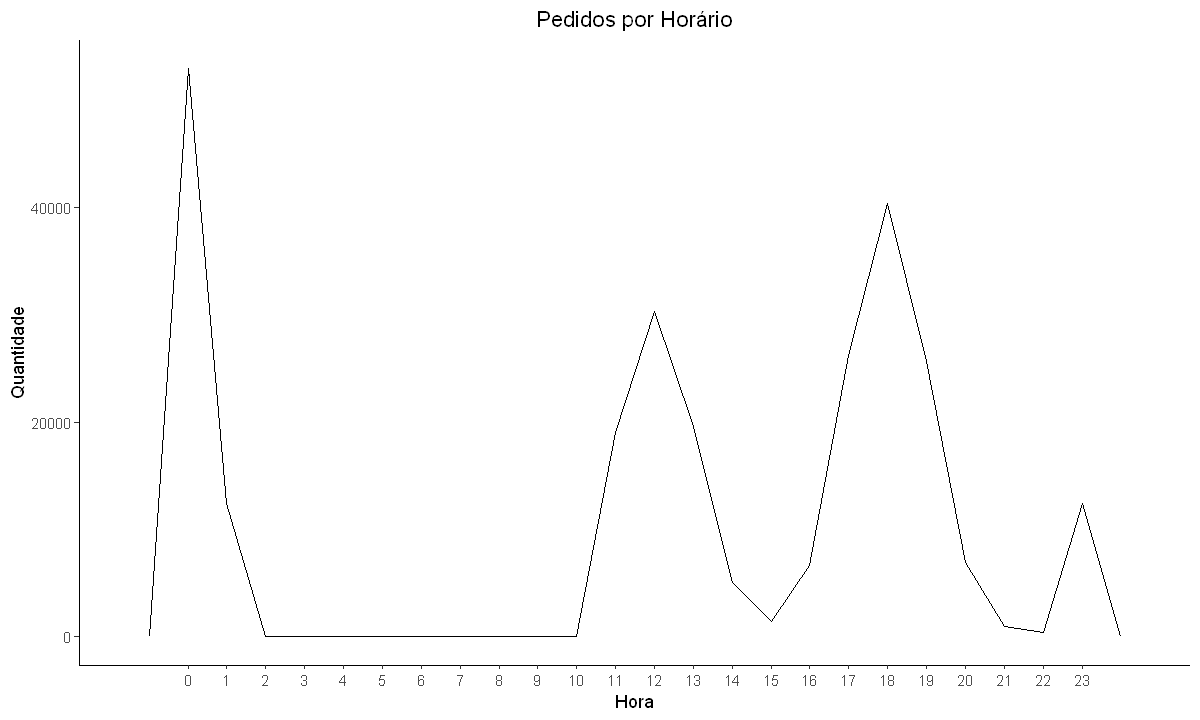

In [21]:
# Pergunta 4.
df1 %>%
mutate(hora = hour(horario_pedido),
       dia = day(horario_pedido),
       mes = month(horario_pedido),
       ano = year(horario_pedido)) %>%
ggplot(aes(hora)) +
geom_freqpoly(binwidth = 1) +
scale_x_continuous(breaks = 0:23) +
ggtitle('Pedidos por Horário') + theme(plot.title = element_text(hjust = 0.5)) +
labs(x = 'Hora', y = 'Quantidade')

Pergunta 4:

- **P4.** Qual o horário gera o maior número de pedidos?
    - Por volta de meia-noite é onde há o maior número de pedidos. 

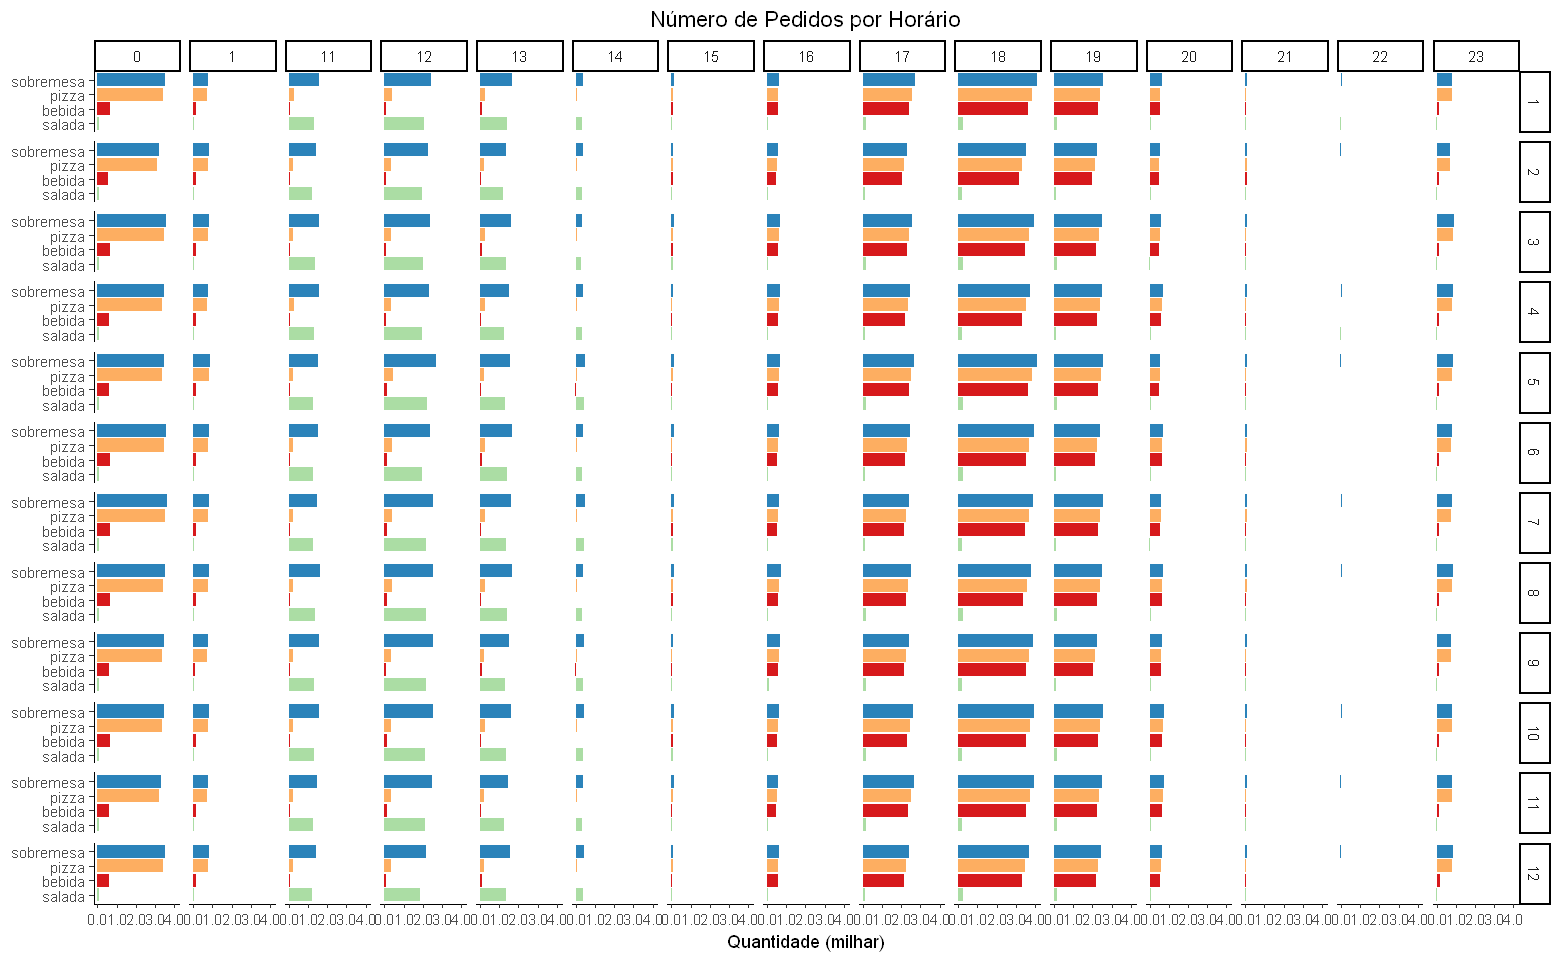

In [22]:
# Pergunta 5.

# Redefinindo a área de plotagem.
fig(13,8)

df1 %>%
mutate(hora = hour(horario_pedido),
       dia = day(horario_pedido),
       mes = month(horario_pedido),
       ano = year(horario_pedido)) %>%
select(mes, hora, nome_item, quantidade_item) %>% 
group_by(mes, hora, nome_item) %>% 
summarise(tot = sum(quantidade_item)) %>%

# Plotagem.
ggplot(aes(x = tot, y = reorder(nome_item, tot), fill = nome_item)) +
geom_col() +
scale_fill_brewer(palette = 'Spectral') +
scale_x_continuous(labels = label_number(scale = 1/1000)) +
guides(fill = F) +
facet_grid(mes~hora) + 
ggtitle('Número de Pedidos por Horário') + theme(plot.title = element_text(hjust = 0.5)) + 
labs(x = 'Quantidade (milhar)', y = NULL)

Pergunta 5:

- **P5.** Quais são os itens mais pedidos por horário?
    - Entre 0h e 1h os itens predominantes são sobremesa e pizza.
    - Durante o horário de almoço, sobremesa e salada são os principais itens.
    - Durante o horário de jantar, há um grande aumento nos pedidos de sobremesa, pizza e bebida.

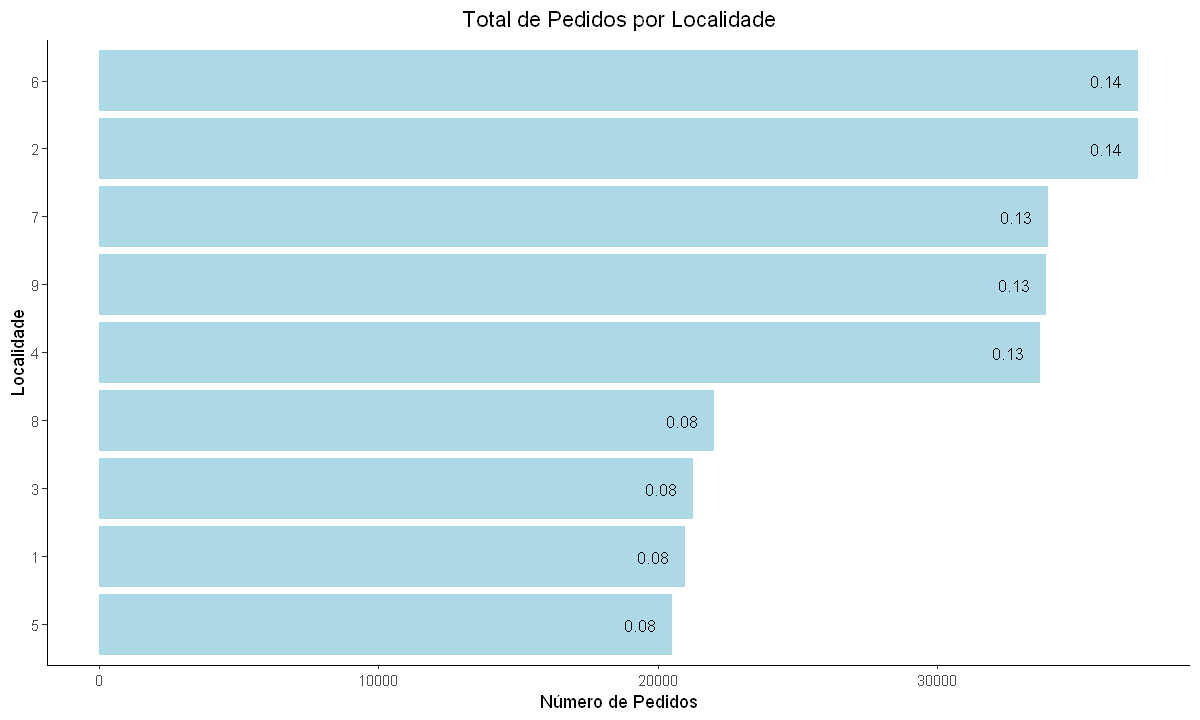

In [23]:
# Pergunta 6.
df1 %>%
group_by(localidade) %>% 
dplyr::summarise(n = n()) %>% 
ggplot(aes(x = reorder(localidade, n), y = n)) +
geom_col(fill = 'lightblue') +
coord_flip() +
ggtitle('Total de Pedidos por Localidade') + theme(plot.title = element_text(hjust = 0.5)) +
xlab("Localidade") + ylab("Número de Pedidos") +
geom_text(aes(label = round(n/sum(n), 2)),
          vjust = 0.5, 
          color = 'black', 
          size = 3.5, 
          hjust = 1.5)

Pergunta 6:

- **P6.** Quais as localidades que mais geram pedidos?
    - As localidades 6 e 2 são as que mais geram pedidos, totalizando 28%.

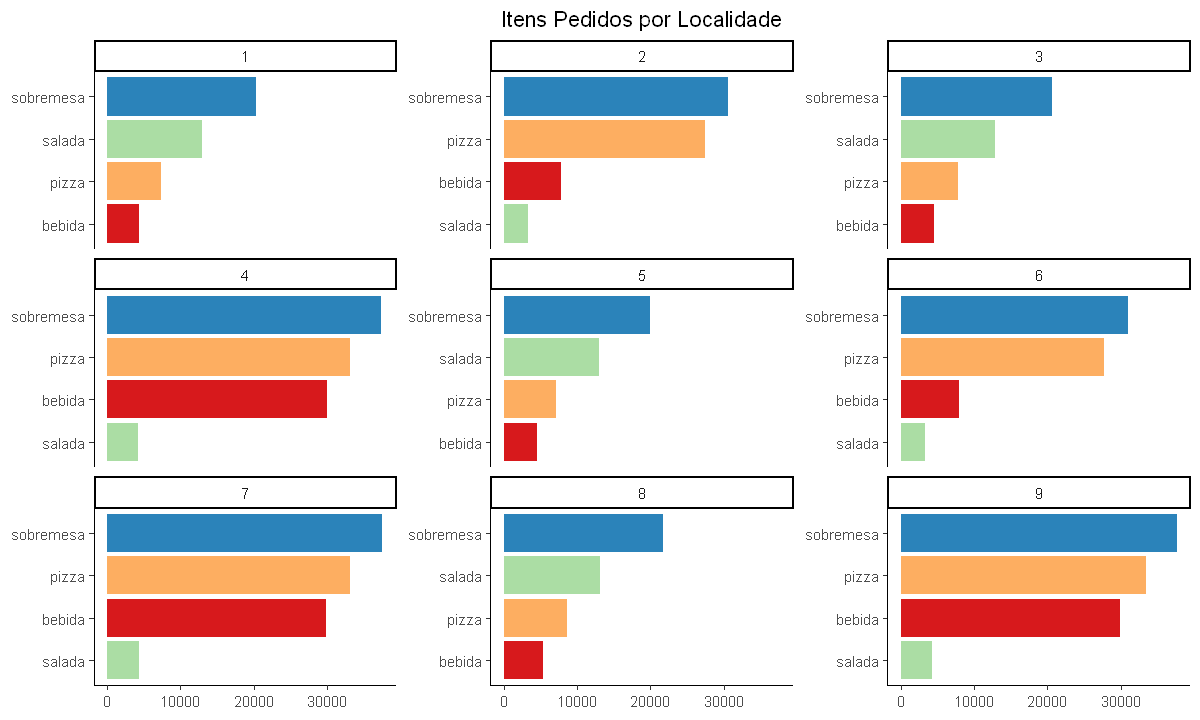

In [24]:
# Pergunta 7.
df1 %>%
mutate(hora = hour(horario_pedido),
       dia = day(horario_pedido),
       mes = month(horario_pedido),
       ano = year(horario_pedido)) %>%
select(localidade, hora, mes, nome_item, quantidade_item) %>%
mutate(localidade = as.factor(localidade)) %>% 
group_by(localidade, hora, mes, nome_item) %>% 
summarise(tot = sum(quantidade_item)) %>%

# PLotagem.
ggplot(aes(x = tot, y = reorder_within(nome_item, tot, localidade), fill = nome_item)) +
geom_col() +
scale_y_reordered() +
scale_fill_brewer(palette = 'Spectral') +
facet_wrap(~localidade, scales = 'free_y') +
guides(fill = F) +
ggtitle('Itens Pedidos por Localidade') + theme(plot.title = element_text(hjust = 0.5)) + 
labs(x = NULL, y = NULL)

Pergunta 7:

- **P7.** Quais os itens mais pedidos em cada localidade?
    - Sobremesa é o principal item nos pedidos de todas as localidades.
    
Respondemos todas as perguntas, assim, finalizamos a etapa de análise exploratória.

## 3. Engenharia de Atributos

### 3.1 Extração de Variáveis (Feature Extraction)

A etapa de extração de variáveis será constituída na transformação do atual conjunto de dados em uma tabela *pivot*. 

In [25]:
# Tabela pivot.
df2 <- df1 %>% 
group_by(id_transacao) %>% 
spread(nome_item, quantidade_item) %>%

# Tratando valores.
tidyr::replace_na((list(bebida = 0,
                        pizza = 0,
                        salada = 0,
                        sobremesa = 0)))

In [26]:
# Visualizando o dataframe.
head(df2)

id_transacao,horario_pedido,localidade,bebida,pizza,salada,sobremesa
0x7901ee,2019-01-16 18:33:00,7,2,2,0,2
0x12b47f,2019-09-04 12:36:00,3,0,0,1,1
0x6d6979,2019-03-18 00:27:00,6,0,2,0,2
0x78dd1e,2019-09-22 00:10:00,2,2,2,0,2
0x4df8ab,2019-01-17 11:35:00,8,0,0,3,3
0x3be6d3,2019-12-21 01:05:00,6,0,1,0,1


### 3.2 Seleção de Variáveis (Feature Selection)

Utilizaremos somente as variáveis numéricas. 

In [27]:
# Seleção das variáveis.
df3 <- df2 %>% 
select(localidade, bebida, pizza, salada, sobremesa)

# Excluindo a variável.
df3$id_transacao <- NULL

Adding missing grouping variables: `id_transacao`


In [28]:
# Informações do dataframe.
str(df3)

tibble [100,000 x 5] (S3: tbl_df/tbl/data.frame)
 $ localidade: num [1:100000] 7 3 6 2 8 6 7 6 2 7 ...
 $ bebida    : num [1:100000] 2 0 0 2 0 0 3 1 1 2 ...
 $ pizza     : num [1:100000] 2 0 2 2 0 1 3 4 2 2 ...
 $ salada    : num [1:100000] 0 1 0 0 3 0 1 0 0 1 ...
 $ sobremesa : num [1:100000] 2 1 2 2 3 1 4 4 2 3 ...


## 4. Pré-Processamento dos Dados

A etapa de pré-processamento dos dados será constituída na normalização das variáveis.

In [29]:
# Função para normalização.
dadosnorm <- function(x) {return ((x - min(x)) / (max(x) - min(x)))}

In [30]:
# Aplicando a normalização.
dfnorm <- as.data.frame(lapply(df3, dadosnorm))

In [31]:
# Dataset original.
head(df3)

localidade,bebida,pizza,salada,sobremesa
7,2,2,0,2
3,0,0,1,1
6,0,2,0,2
2,2,2,0,2
8,0,0,3,3
6,0,1,0,1


In [32]:
# Dataset normalizado.
head(dfnorm)

localidade,bebida,pizza,salada,sobremesa
0.750,0.4,0.4,0.0,0.25
0.250,0.0,0.0,0.2,0.00
0.625,0.0,0.4,0.0,0.25
0.125,0.4,0.4,0.0,0.25
0.875,0.0,0.0,0.6,0.50
0.625,0.0,0.2,0.0,0.00


## 5. Modelagem Preditiva

Um dos principais algoritmos para clusterização é o *K-means*. 

O objetivo desse algoritmo é encontrar similaridades entre os dados e agrupá-los conforme o número de clusters passado pelo parâmetro *k*.

Para mais detalhes sobre esse algoritmo, acesse <a href='https://medium.com/@rafaelfelippe_/k-means-8b3d26bba387'>este link</a> em meu blog de estudos.

### 5.1 Avaliação da Tendência dos Clusters

Vamos avaliar se o conjunto de dados é "clusterizável", ou seja, se ele pode ser segmentado de forma satisfatória ou não.

Para essa tarefa, utilizaremos a estatística de *Hopkins*. 

In [33]:
# Amostra dos dados.
set.seed(42)
sample_df <- dfnorm %>% as_tibble() %>% 
sample_frac(0.02)

Utilizaremos uma amostra de 2% dos dados para realizar o teste. 

In [34]:
# Visualizando o dataframe.
head(sample_df)

localidade,bebida,pizza,salada,sobremesa
0.000,0.0,0.0,0.6,0.50
0.125,0.8,0.8,0.0,0.75
0.125,0.0,0.4,0.0,0.25
0.375,0.8,0.8,0.0,0.75
0.625,0.0,0.2,0.2,0.25
0.000,0.2,0.4,0.0,0.25


In [35]:
# Teste de Hopkins.
hopkins(sample_df, n = nrow(sample_df)-1)

$H
[1] 0.2217963

Interpretação do resultado:

- **$H > 0.5**: dataset não é "clusterizável".

- **$H < 0.5**: dataset é "clusterizável" (quanto mais próximo de zero melhor).

Ou seja, os dados possuem algum padrão que nos permite aplicar a clusterização.

### 5.2 Definindo o Número de Clusters

Para essa tarefa, utilizaremos o método de *Elbow*.

Basicamente o que esse método faz é testar a variância dos dados em relação ao número de clusters. 

O valor ideal é considerado quando o aumento no número de clusters não representar um valor significativo de ganho de informação.

In [36]:
# Criando a função.
elbow <- function(dataset){
    wss <- numeric(15)
    for (i in 1:15) wss[i] <- sum(kmeans(dataset, centers = i, nstart = 100)$withinss)
    plot(1:15, wss, type = 'b', main = 'Método de Elbow', xlab = 'Número de Clusters', pch = 8)}

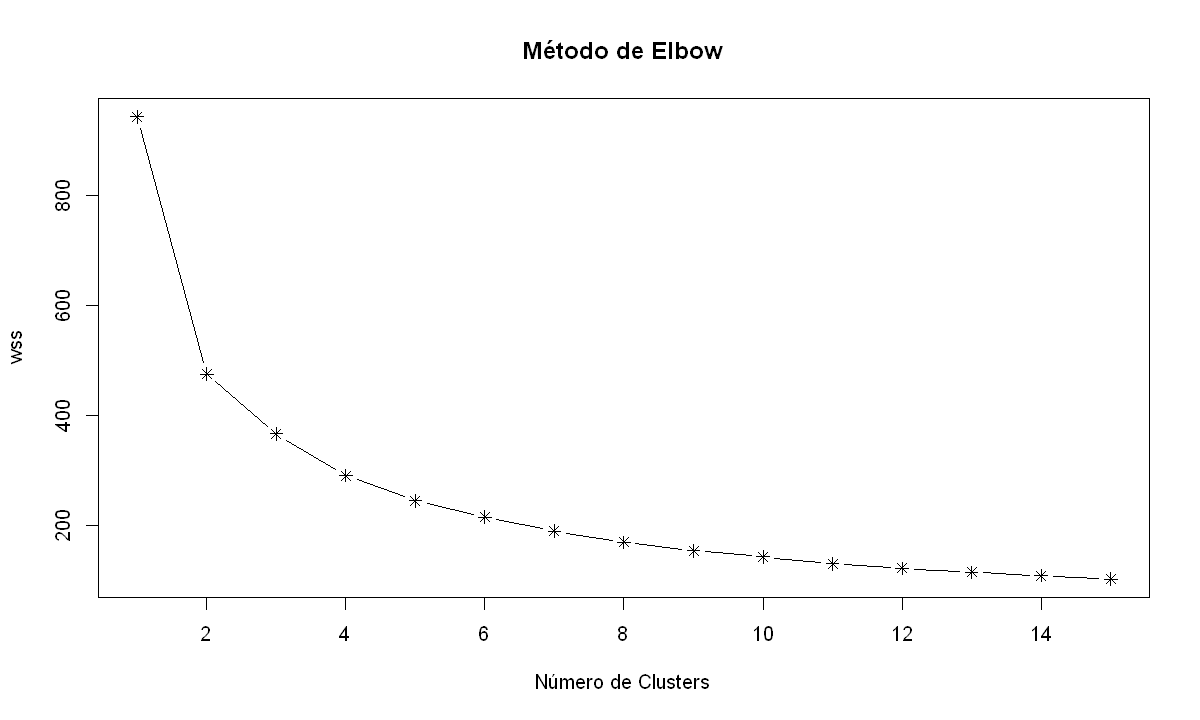

In [37]:
# Método de Elbow.
elbow(sample_df)

- Vamos considerar o valor de *k = 3*, pois a partir desse número há pouco ganho de informação.

### 5.3 Criação do Modelo Preditivo

In [38]:
# Instanciando e treinando o modelo.
set.seed(42)
modelo <- kmeans(dfnorm, 3)

In [39]:
# Tamanho dos clusters.
modelo$size

[1] 20289 31582 48129

Utilizando a amostra de dados, podemos ter uma visualização de como foi feita a segmentação.

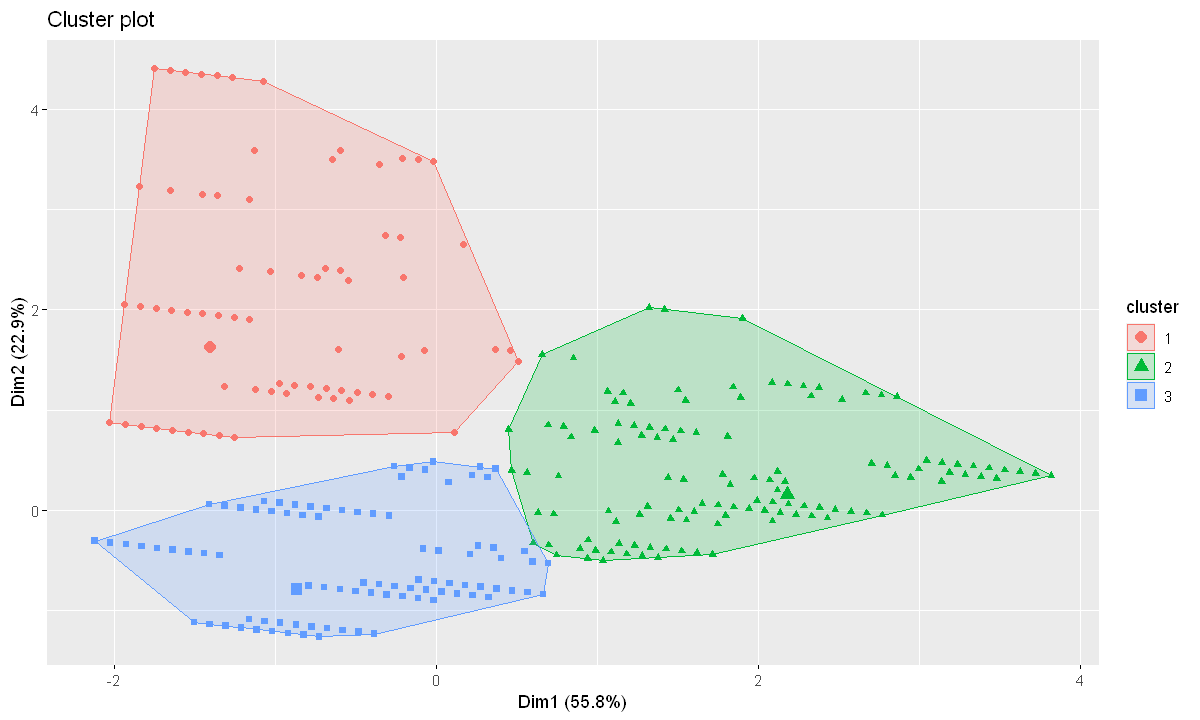

In [40]:
# Clusterização com dados amostrais.
cluster_viz <- eclust(sample_df, 'kmeans', k = 3, graph = FALSE)
fviz_cluster(cluster_viz, geom = 'point')

## 6. Análise de Clusters

Iniciaremos uma análise com objetivo de identificar padrões nos clusters e recomendar ações para o departamento de Marketing.

In [41]:
# Associando o resultado ao dataframe.
df2$cluster <- modelo$cluster
head(df2)

id_transacao,horario_pedido,localidade,bebida,pizza,salada,sobremesa,cluster
0x7901ee,2019-01-16 18:33:00,7,2,2,0,2,3
0x12b47f,2019-09-04 12:36:00,3,0,0,1,1,3
0x6d6979,2019-03-18 00:27:00,6,0,2,0,2,3
0x78dd1e,2019-09-22 00:10:00,2,2,2,0,2,3
0x4df8ab,2019-01-17 11:35:00,8,0,0,3,3,1
0x3be6d3,2019-12-21 01:05:00,6,0,1,0,1,3


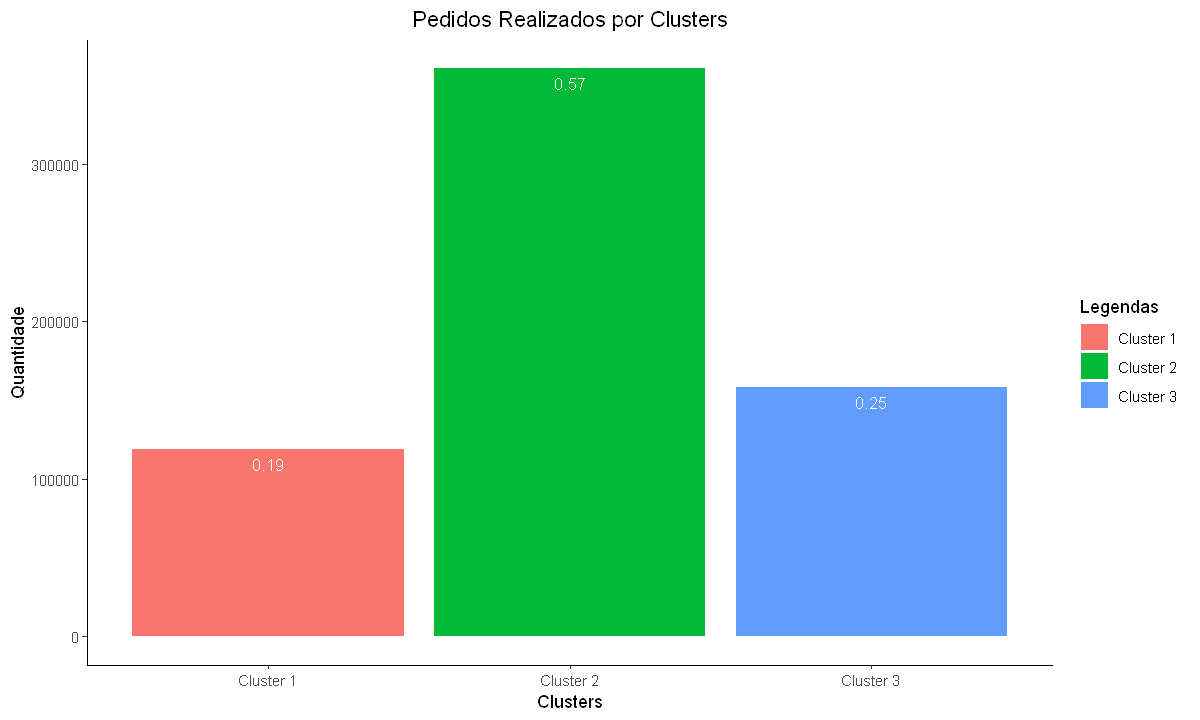

In [42]:
# Pedidos por clusters.
df2 %>% as.data.frame() %>%
select(bebida, pizza, salada, sobremesa, cluster) %>%
as_tibble() %>%
gather(item, qtd, 1:4) %>%
mutate(cluster = factor(cluster, levels = c(1, 2, 3),
                        labels = c('Cluster 1', 'Cluster 2', 'Cluster 3'))) %>%
group_by(cluster) %>%
dplyr::summarise(qtd = sum(qtd)) %>%

# Plotagem.
ggplot(aes(x = cluster, y = qtd)) +
geom_col(aes(fill = cluster)) +
ggtitle('Pedidos Realizados por Clusters') + theme(plot.title = element_text(hjust = 0.5)) +
labs(x = 'Clusters', y = 'Quantidade') +
geom_text(aes(label = round(qtd/sum(qtd), 2)),
          vjust = 1.6, 
          color = 'white', 
          size = 3.5) +
scale_fill_discrete(name = 'Legendas')

- O cluster 1 é o menor entre os 3 clusters gerados.
- O cluster 2 é o que mais registrou pedidos, totalizando 57%.

Criaremos funções para analisar os clusters individualmente.

In [43]:
# Criando funções.

# Itens mais pedidos.
qnt_pedidos <- function(x, cor_escolhida){
    df2 %>% as.data.frame() %>%
    mutate(Cluster = factor(cluster, levels = c(1, 2, 3),
                            labels = c('Cluster 1', 'Cluster 2', 'Cluster 3'))) %>% 
    filter(Cluster == x) %>% 
    select(bebida, pizza, salada, sobremesa) %>% 
    as_tibble() %>% 
    gather(item, qtd, 1:4) %>% 
    group_by(item) %>% 
    dplyr::summarise(qtd = sum(qtd)) %>% 
    ggplot(aes(x = item, y = qtd)) +
    geom_col(fill = cor_escolhida) +
    ylim(c(0, 150000)) +
    ggtitle('Itens Mais Pedidos') +
    geom_text(aes(label = round(qtd/sum(qtd), 2)), 
              vjust = -1, 
              color = 'black', 
              size = 3.5)}


# Distribuição de frequência.
frq_pedidos <- function(x,y){
    df2 %>% as.data.frame() %>% 
    mutate(Cluster = factor(cluster, levels = c(1, 2, 3),
                            labels = c('Cluster 1', 'Cluster 2', 'Cluster 3'))) %>% 
    filter(Cluster == x) %>% 
    select(bebida, pizza, salada, sobremesa) %>% 
    as_tibble() %>% 
    gather(item, qtd, 1:4) %>% 
    filter(qtd > 0) %>% 
    ggplot(aes(x = qtd)) +
    geom_histogram(aes(y = ..density..), binwidth = 1, show.legend = FALSE, fill = y) +
    facet_grid(~item) +
    ggtitle('Distribuição de Frequência') +
    xlab('Quantidade')}

# Pedidos por horário.
hr_pedidos <- function(x){
    df2 %>% as.data.frame() %>% 
    select(horario_pedido, bebida, pizza, salada, sobremesa, cluster) %>% 
    gather(item, qtd, 2:5) %>% 
    mutate(horario = hour(horario_pedido),
           Cluster = factor(cluster,levels = c(1, 2, 3),
                            labels = c('Cluster 1', 'Cluster 2', 'Cluster 3'))) %>% 
    select(Cluster, item, qtd, horario) %>% 
    filter(Cluster == x, qtd > 0) %>% 
    select(item, qtd, horario) %>% 
    as_tibble() %>% 
    ggplot(aes(x = horario, color = item)) +
    geom_freqpoly(binwidth = 1, size = 1) +
    xlim(c(0, 23)) +
    xlab('Hora do dia') +
    ggtitle('Pedidos por Horário')}

### 6.1 Análise Cluster 1

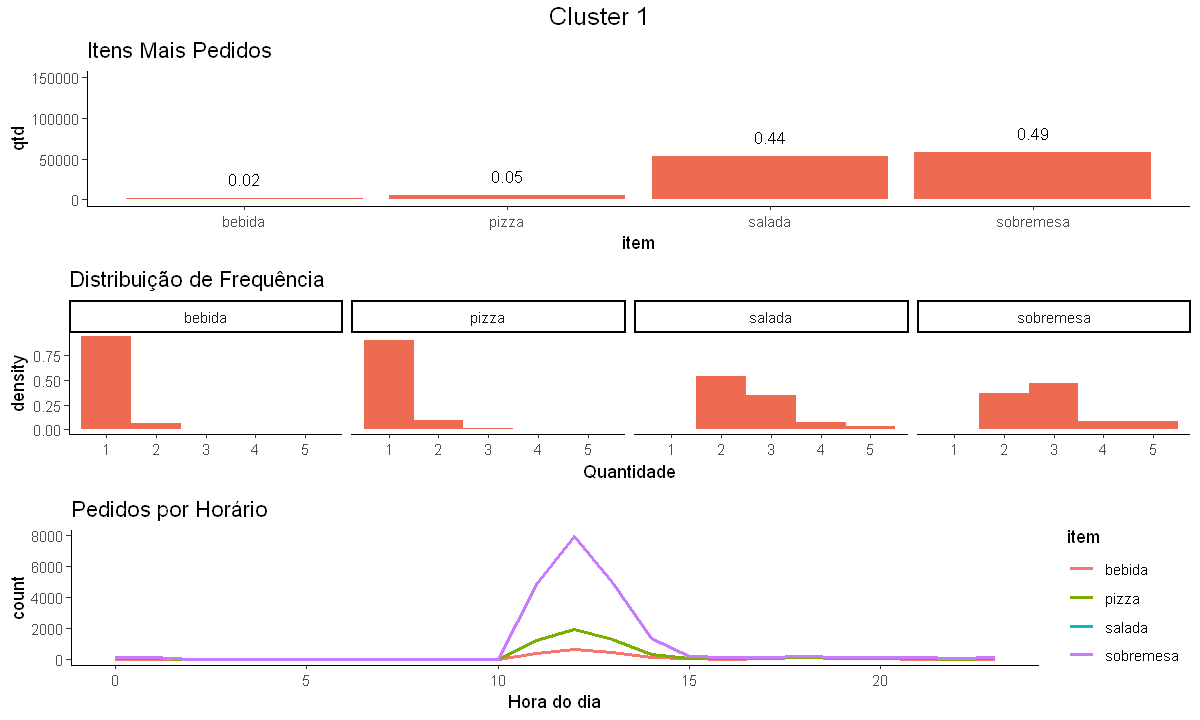

In [44]:
# Cluster 1.
gridExtra::grid.arrange(qnt_pedidos('Cluster 1', 'coral2'),
                        frq_pedidos('Cluster 1', 'coral2'),
                        hr_pedidos('Cluster 1'),
                        nrow = 3,
                        top = textGrob('Cluster 1', gp = gpar(fontsize = 15)))

**Principais Características do Cluster 1**:

- Possui o menor número de pedidos (19%).

- É o principal consumidor de salada.

- Pizza e bebida somam apenas 7% do total dos pedidos.

- Pedidos são realizados essencialmente no horário de almoço.



**Recomendações para o Departamento de Marketing**:

- Incluir mais opções de produtos saudáveis no cardápio, como lanches naturais, comidas veganas e chás, principalmente no horário de almoço, onde ocorre o maior número de pedidos desse segmento. Para o período noturno, onde esses clientes são menos presentes, oferecer esses novos produtos pode ser uma estratégia para aumentar as vendas nesse horário.


- Criar promoções envolvendo os itens salada e sobremesa, como por exemplo: "Na compra da salada "X", ganhe uma sobremesa grátis". 


### 6.2 Análise Cluster 2

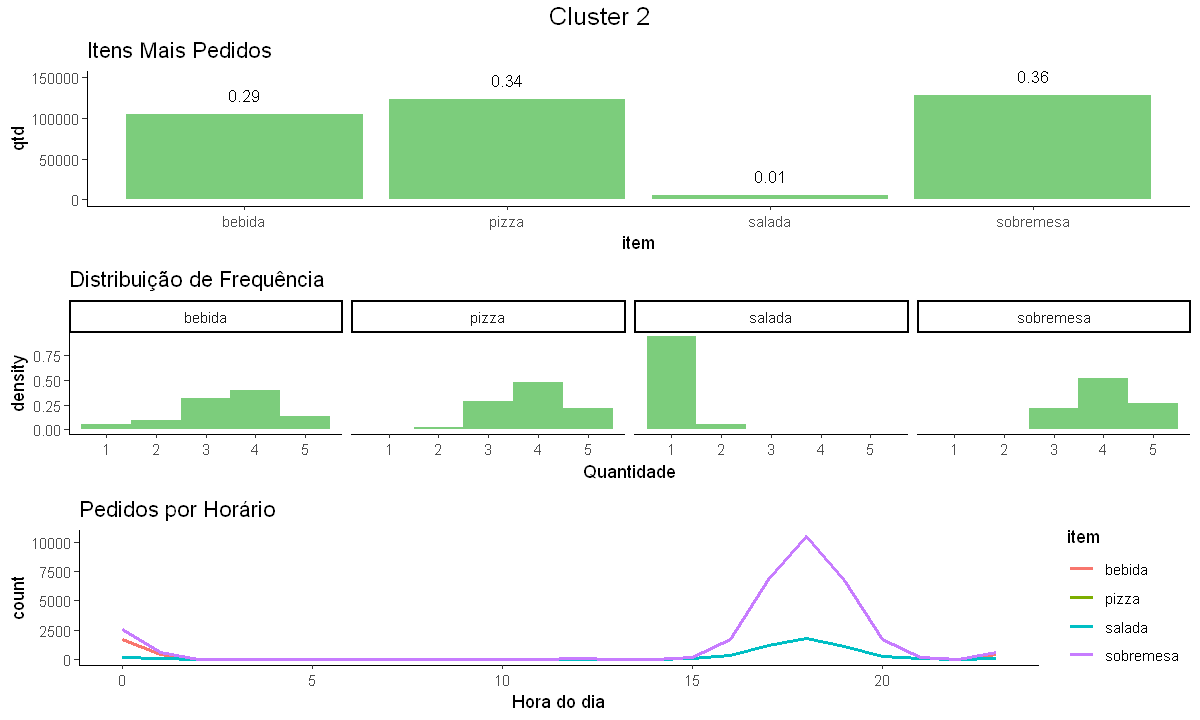

In [45]:
# Cluster 2.
gridExtra::grid.arrange(qnt_pedidos('Cluster 2', 'palegreen3'),
                        frq_pedidos('Cluster 2', 'palegreen3'),
                        hr_pedidos('Cluster 2'),
                        nrow = 3,
                        top = textGrob('Cluster 2', gp = gpar(fontsize = 15)))

**Principais Características do Cluster 2**:

- É o principal cluster, possuindo 57% dos pedidos.

- É o principal consumidor de pizza.

- Pedidos de salada são praticamente nulos.

- Pedidos são realizados em grandes quantidades e no período tarde/noite.


**Recomendações para o Departamento de Marketing**:

- Criar combos promocionais envolvendo sobremesa, pizza e bebida, pois são os itens mais consumidos do cluster.


- Criar promoções para captar clientes com perfis parecidos. Como esse cluster tem um grande número de clientes consumindo o principal item do cardápio (pizza), provavelmente esse tipo de promoção atrairia mais clientes com perfil parecido.

### 6.3 Análise Cluster 3

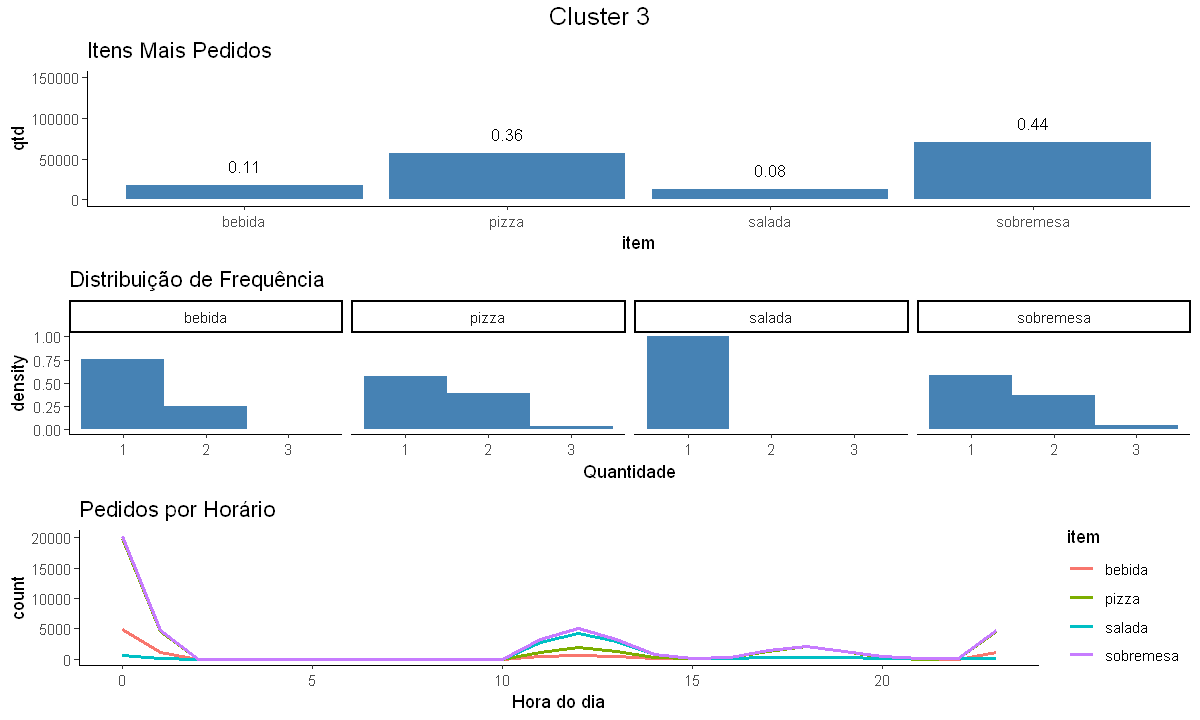

In [46]:
# Cluster 3.
gridExtra::grid.arrange(qnt_pedidos('Cluster 3', 'steelblue'),
                        frq_pedidos('Cluster 3', 'steelblue'),
                        hr_pedidos('Cluster 3'),
                        nrow = 3,
                        top = textGrob('Cluster 3', gp = gpar(fontsize = 15)))

**Principais Características do Cluster 3**:

- Possui 25% dos pedidos.

- É o cluster mais equilibrado em relação aos pedidos.

- Pedidos são realizados em pequenas quantidades.

- Alto número de pedidos por volta da meia noite.


**Recomendação para o Departamento de Marketing**:

- Criar combos promocionais com o objetivo de aumentar o número de itens por pedido.

## 7. Conclusões Finais

Para a realização da segmentação dos clientes da Big Rango utilizamos o algoritmo *K-means*.

Através do método de *Elbow*, definimos que os dados deveriam ser segmentados em três clusters, foram eles:

- **Cluster 1:** clientes mais saudáveis; alto consumo de salada.
- **Cluster 2:** clientes que fazem pedidos em grandes quantidades; é o principal cluster para a empresa.
- **Cluster 3:** clientes que fazem pedidos próximos a meia noite; é o cluster mais equilibrado. 

Além das recomendações já feitas na etapa anterior, durante a análise exploratória geramos alguns insights interessantes para a empresa:

- Maio foi o mês que teve o maior número de pedidos, enquanto fevereiro registrou o menor número.
- Geralmente nos últimos dias dos meses há uma queda no número de pedidos. 
- As localidades 6 e 2 são as que mais geram pedidos, totalizando 28%.

Depois de garantir uma excelente segmentação, a Big Rango já pode direcionar ações para melhorar a experiência de seus clientes, adotando estratégias e campanhas customizadas para cada grupo, e consequentemente impactando a sua lucratividade!